In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter, ImageChops

### Functions and Globals

In [18]:
normalise = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )

preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalise
    ])

def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    return image

def un_normalize(image):
    return image * torch.Tensor([0.229, 0.224, 0.225])  + torch.Tensor([0.485, 0.456, 0.406])

def dream_forward_pass(image, layer, iterations, lr):        
    '''
    image - input image to pass forward through VGG-16
    layer - which layer to stop the forward pass
    iterations - how many times to iterate through the network
    lr - learning rate
    '''
    
    ### preprocess transforms image to a 224x224 tensor
    ### unsqueeze transforms 224x224 -> 1X224x224
    input = Variable(preprocess(image).unsqueeze(0), requires_grad=True)
    
    ### zero out the gradient 
    vgg.zero_grad()
    
    for i in range(iterations):
        output = input
        ### loop through the layer and update the outpur
        for j in range(layer):
            output = modulelist[j+1](output)
        
        ### calculate loss (normalize, backprop, learning rate)
        loss = output.norm()
        loss.backward()
        input.data = input.data + lr * input.grad.data
    
    ### squeeze removes the 1's from the shape i.e 1x224x224 -> 224x224
    input = input.data.squeeze()
    input.transpose_(0,1)
    input.transpose_(1,2)
    
    ### un normalize the input and clip numbers to be between 0 and 1
    input = np.clip(un_normalize(input), 0, 1)
    img = Image.fromarray(np.uint8(input*255))
    return img


### VGG-16

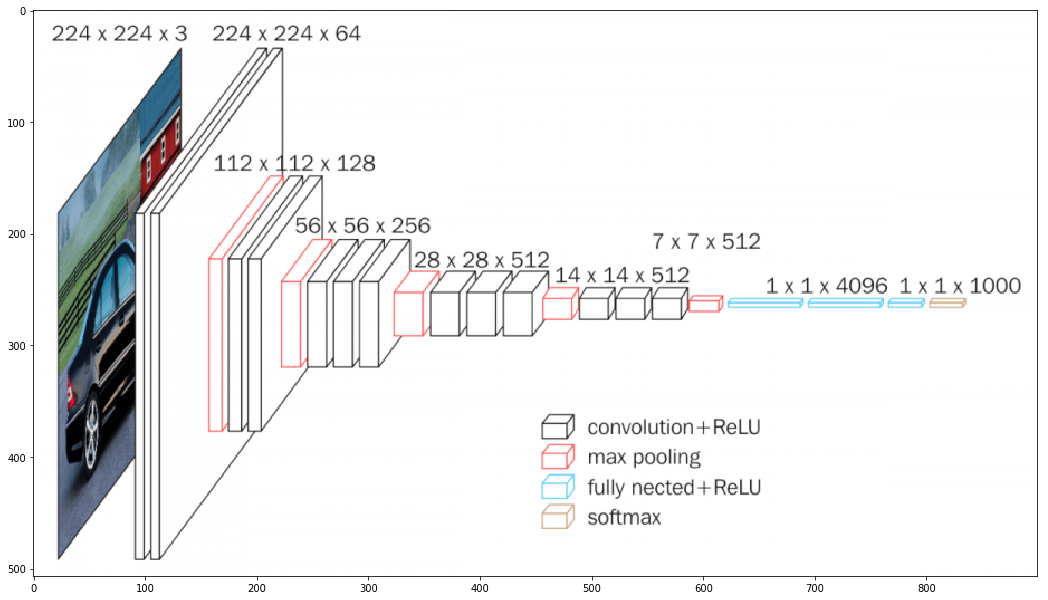

In [19]:
image = Image.open('VGG16_arch.png')
plt.figure(figsize=(18,15))
plt.imshow(image)

In [20]:
vgg = models.vgg16(pretrained=True)         ### load the pretrained model
print(vgg)
modulelist = list(vgg.features.modules())   ### Save each layer into a list for easy access to each layer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### Political Figures 

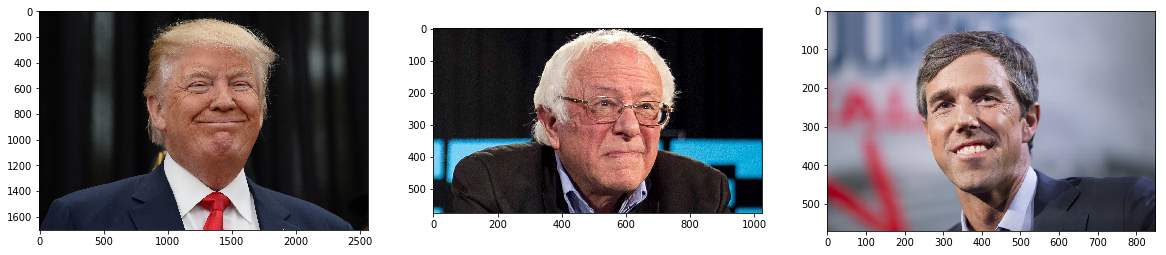

In [21]:
input_images = ['trump.jpg', 'sanders.jpg', 'beto.jpg']

fig = plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = load_image(input_images[i])

### Deep Dream

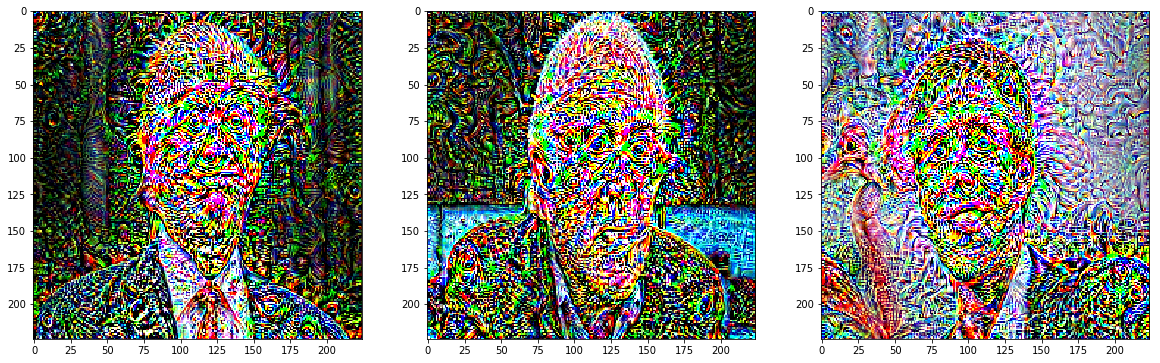

In [26]:
layer_number = 28
iterations = 20
lr = .3

fig = plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = Image.open(input_images[i])
    img = dream_forward_pass(img, layer_number,iterations, lr)
    plt.imshow(img)

### Nature

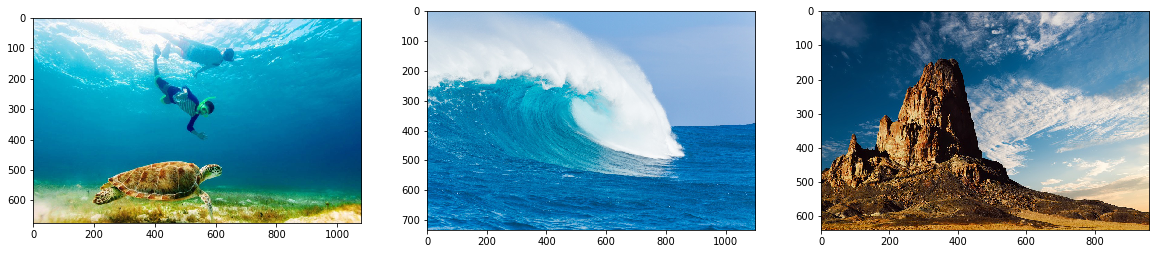

In [27]:
input_images = ['underwater_turtle.jpg', 'waves.jpg', 'mountain.jpg']

fig = plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = load_image(input_images[i])

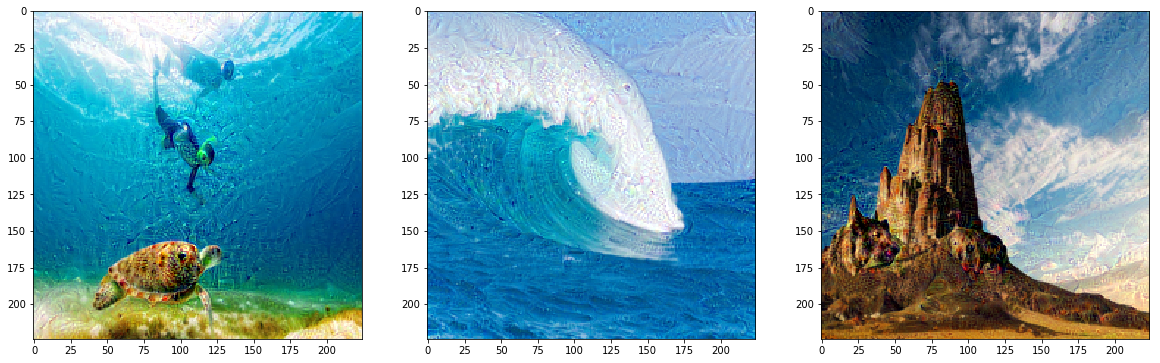

In [30]:
layer_number = 28
iterations = 5
lr = .1

fig = plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = Image.open(input_images[i])
    img = dream_forward_pass(img, layer_number,iterations, lr)
    plt.imshow(img)